## Problem 3

Download brown corpus from NLTK.

#### Part (a)

In [1]:
import nltk
nltk.download('brown')
dataset = nltk.corpus.brown.words(categories=['news','learned'])

[nltk_data] Downloading package brown to
[nltk_data]     C:\Users\prern\AppData\Roaming\nltk_data...
[nltk_data]   Package brown is already up-to-date!


Data cleaning and inserting start-stop symbols


In [2]:
import re
lst_dt=[]
for w in dataset : 
    w = w.lower()
    w = re.sub(r"\d+", "", w)
    if(w == "."):
        lst_dt.append('</s>')
        lst_dt.append('<s>')
    w = re.sub(r'[^a-zA-Z\s]', '', w)    
    if(w != ''):
        lst_dt.append(w)

lst_dt.insert(0,'<s>')
lst_dt.pop()
#print(lst_dt)

'<s>'

Creating function to split the dataset into training, development and testing data


In [3]:
def split_st(data,n,m):
    
    le=len(data)
    l=int(round(len(data)*n))

    train=data[1:l]
    test_dt=data[l:le]
    
    d=int(round(len(train)*m))

    dev_dt=train[1:d]
    train_dt=train[d:l]
    
    return (train,test_dt,dev_dt,train_dt)

_Calling the above function and splitting the dataset into training and testing in the ratio of 70:30. <br>
Also, we take 15% of the initial training data as the developing data and take the rest 55% as the final training data.<br>
We will use  train and test data i.e 70% in part c_

In [4]:
train,test_dt,dev_dt,train_dt=split_st(lst_dt,.7,.15)

 __Defining function to build n-grams__


In [5]:
def build_ngrams(ngram_dt, n):
  return list(zip(*[ngram_dt[i:] for i in range(n)]))

In [8]:
# Building unigrams and bigrams
unig = build_ngrams(train_dt, 1)
big = build_ngrams(train_dt, 2)

dev_uni = build_ngrams(dev_dt, 1)
dev_bi = build_ngrams(dev_dt, 2)

train_uni = build_ngrams(train, 1)
train_bi = build_ngrams(train, 2)

test_uni = build_ngrams(test_dt, 1)
test_bi = build_ngrams(test_dt, 2)


In [9]:
# Defining function to build n-gram models. This model gives the 
# probability against each n-gram.
import collections, nltk

def model_dt(tokens,l):    
    model = collections.defaultdict(lambda: l)
    for f in tokens:
        try:
            model[f] += 1
        except KeyError:
            model [f] = 1
            continue
    for word in model:
        model[word] = model[word]/float(sum(model.values()))
    return model

In [10]:
# Defining function to calculate the perplexity
import math
def perplexity(testset, model):
    perplexity = 1
    N = 0
    for word in testset:
        N += 1
        if(model[word]!=0):
            perplexity = perplexity + math.log(model[word],2)        
    perplexity = -(perplexity * 1/N )
    return pow(2,perplexity)

In [11]:
model_ug = model_dt(unig,0)
ug_pp = perplexity(unig, model_ug)
print(ug_pp)

357.9053381473722


In [12]:
model_bg = model_dt(big,0)
bg_pp = perplexity(big, model_bg)
print(bg_pp)

11690.413919798324


* Perplexity of unigram and bigram model on training data is 363.978383749 and 11707.5716564 respectively.

#### Part(b) 

 __For unigram__

_Using devloping data for calculating perplexity_

In [13]:
import matplotlib.pyplot as plt
x=[]
y=[]
lamda=[0,0.001,0.05,0.1,1,1.5,2,3,4] #assuming lambda
for l in lamda:
    m=model_dt(unig,l)
    pp=perplexity(dev_uni,m)
    x.append(l)
    y.append(pp)
    #print(l,pp)

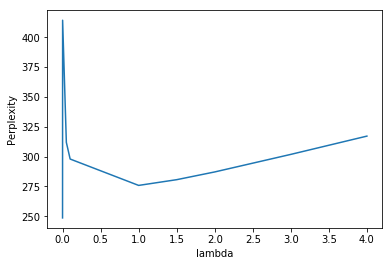

In [14]:
plt.plot(x,y)
plt.xlabel('lambda')
plt.ylabel('Perplexity')
plt.show()

__For bigram__


In [15]:
import matplotlib.pyplot as plt
x=[]
y=[]
for l in range(0,8,2):
    m=model_dt(big,l)
    pp=perplexity(dev_bi,m)
    x.append(l)
    y.append(pp)
   # print(l,pp)

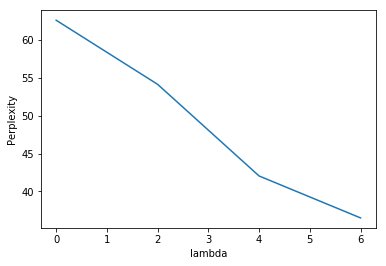

In [16]:
plt.plot(x,y)
plt.xlabel('lambda')
plt.ylabel('Perplexity')
plt.show()

#### Part(c)

In [18]:
# Using ideal lambda value as 1 (from above unigram plot), we build the 
# below unigram model on training and developing data.
mod_unigram = model_dt(train_uni,1)
pp_unigram = perplexity(test_uni,mod_unigram)

# Using ideal lambda value as 6 (from above bigram plot), we build the 
# below bigram model on training and developing data.

mod_bigram = model_dt(train_bi,6)
pp_bigram = perplexity(test_bi,mod_bigram)

print ('Perplexity of Unigram model is',pp_unigram)
print ('Perplexity of Bigram model is',pp_bigram)

Perplexity of Unigram model is 210.17413284655666
Perplexity of Bigram model is 38.769998457925126


#### Part(d)


In [19]:
m=nltk.corpus.brown.sents(categories=['news','trained'])
len(max(m))

14

We will use 14 as the maximum words while generating random sentences, as the maximum lenth of sentence is 14 in our dataset.

__For unigram__

In [37]:
import random
x=0
while x <5:
    for i in range(0,14):
        for w in random.choice(unig):
            if w =='</s>' or w=='.':                
                break
            elif w=='<s>':                
                continue
        else:
            print (w, end=" ")
    x=x+1
    print('\n')

doesnt times the of there fast record <s> also <s> a the infested invitation 

to the from of the the lower values primary cost was finding in 

austins that sitting efficiency be steel not <s> and every program wideopen may 

scrapbook youth <s> stranger against power of where a first up paper cut 

meredith a policy traffic social about necessitated among where by it and mussett so 



__For bigram__

In [38]:
# For bigram
import random
x=0
while x <5:
    for i in range(0,14):
        for w in random.choice(big):
            if w =='</s>' or w=='.':                
                break
            elif w=='<s>':                
                continue
        else:
            print (w, end = " ")
    x=x+1
    print('\n')

just mice be individuals av the were the while senate radiation registration they to 

and errors the explains a chlorine shared a with boxwood the conducted than restrict 

for major two died of waves fact moore attraction is integrated drop plasma 

the eleven nor where many italian per by or more enable form 

a kittredge crime had charged elections out must of to in evidence scale 



#### Part(e) 

##### Building Trigram

In [23]:
# Creating sentences for trigram
import re
lst_dt=[]
for w in dataset : 
    w = w.lower()
    w = re.sub(r"\d+", "", w)
    if(w == "."):
        lst_dt.append('</s>')
        lst_dt.append('</s>')
        lst_dt.append('<s>')
        lst_dt.append('<s>')
    w = re.sub(r'[^a-zA-Z\s]', '', w)    
    if(w != ''):
        lst_dt.append(w)

lst_dt.insert(0,'<s>')
lst_dt.insert(0,'<s>')
lst_dt.pop()
lst_dt.pop()

'<s>'

In [24]:
# Building trigram
trig = build_ngrams(lst_dt, 3)

In [39]:
# Generating random sentences from trigram model
import random
x=0
while x <5:
    for i in range(0,14):
        for w in random.choice(trig):
            if w =='</s>' or w=='.':                
                break
            elif w=='<s>':                
                continue
        else:
            print (w, end=" ")
    x=x+1
    print('\n')

of sure colonel regions log the the the ten 

the support extensively mrs poems of apparently satisfied took achieve at lag standins 

directly in innovations biggest material the libyan dots national pure other to plain 

used is and earth permits noise them in with every similar moral eightinch 

of playing unit system high the being of than 



__Yes we can see trigram is generating better sentences than unigram or bigram model.__